<div style="background-color:#f5f3f4;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>India Flight Fare Prediction (Kaggle Problem Statement)</strong></h3>

<h4 style="color:#2b2d42;font-size:35px;font-family:Georgia;">In this notebook, I have made an attempt to develop a model to solve the Kaggle Problem Statement - India Flight Fare Prediction using Machine Learning models.</h4>
</div>

<div style="background-color:#f5f3f4;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;text-align:center;border-radius:4px 4px;border-style: solid;border-width:5px;border-color:#e56b6f; padding: 1px 1px;"><br>Airline companies want to calculate flight prices. These methods take financial, marketing, and various social factors into account to predict flight prices.Here we have flight tickets data for various airlines between March and June of 2019 and between various cities. Size of training set: 10683 records.<br><br>
</p>
</div>

<div style="background-color:#E5E5E5;">

<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>About the Dataset</strong></h3>

<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;""><br><b>1.Airline:-</b> Name of the airline used for traveling.<br>
<b>2.Date_of_Journey:-</b> Date at which a person traveled.<br>
<b>3.Source:-</b> Starting location of flight.<br>
<b>4.Destination:-</b> Ending location of flight.<br>
<b>5.Route:-</b> This contains information on starting and ending location of the journey in the standard format used by airlines.<br>
<b>6.Dep_Time:-</b> Departure time of flight from starting location.<br>
<b>7.Arrival_Time:-</b> Arrival time of flight at destination.<br>
<b>8.Duration:-</b> Duration of flight in hours/minutes.<br>
<b>9.Total_Stops:-</b> Number of total stops flight took before landing at the destination.<br>
<b>10.Additional_Info:-</b> Shown any additional information about a flight.<br>
<b>11.Price:-</b> Price of the flight.<br>
    <br>
</p>
</div>

<div style="background-color:#f5f3f4;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Importing the libraries and the dataset</strong></h3></div>

In [129]:
#importing the libraries
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from datetime import datetime 
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows",None)

#Libraries to visualize the dataset
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# Some more necessary libraries (These are for drawing the image on the bar charts)
import matplotlib.font_manager as fm
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

<div style="background-color:#f5f3f4;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Reading Train Data</strong></h3>
</div>

In [130]:
#data is in excel format so, read data as 'read_excel'
train = pd.read_excel('Data_Train.xlsx')
train.head(10).style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


<div style="background-color:#f5f3f4;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Reading Test Data</strong></h3>
</div>

In [131]:
test = pd.read_excel('Test_set.xlsx')
test.head(10).style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [132]:
print('Training dataset shape:', train.shape)
print('Test dataset shape:', test.shape)

Training dataset shape: (10683, 11)
Test dataset shape: (2671, 10)


<div style="background-color:#f5f3f4;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Checking if there are any missing values in Training and Test Dataset</strong></h3></div>

In [133]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [134]:
train[train['Total_Stops'].isnull()].style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,nan,09:45,09:25 07 May,23h 40m,nan,No info,7480


In [135]:
train[train['Route'].isnull()].style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,nan,09:45,09:25 07 May,23h 40m,nan,No info,7480


In [136]:
train=train.dropna(axis=0, how='any')
#since, there is only one missing value in Total_Stops and Route and both coincidentally are from same record, we can just drop that record/row

In [137]:
train.shape

(10682, 11)

In [138]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


<div style="background-color:#f5f3f4;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Checking if there are any duplicate values in Training and Test Dataset</strong></h3></div>

In [140]:
train.duplicated().sum()

220

In [141]:
#DROPPING THE DUPLICATE.... 
train.drop_duplicates(inplace=True)

In [142]:
#CHECKING THE DUPLICATE VALUES IF ANY...
train[train.duplicated()].style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [143]:
test.duplicated().sum()

26

In [144]:
#DROPPING THE DUPLICATE.... 
test.drop_duplicates(inplace=True)
#CHECKING THE DUPLICATE VALUES IF ANY...
test[test.duplicated()].style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info


In [145]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [146]:
print('Training dataset shape:', train.shape)
print('Test dataset shape:', test.shape)

Training dataset shape: (10462, 11)
Test dataset shape: (2645, 10)


<div style="background-color:#f5f3f4; border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#e56b6f;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Takeaway Points</strong></h3> 
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;text-align:center;"><br>
Number of features in Training Data = 11<br>
Number of features in Test Data = 10<br>
Number of rows in Training Data = 10462<br>
Number of rows in Test Data = 2645<br>
Number of categorical type of feature = 10<br>
Number of numerical type of feature = 1<br>
<br></p>
</div>

In [147]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

df_train = {var: pd.DataFrame(train[var].value_counts()) 
              for var in {'Airline', 'Source', 'Destination','Total_Stops'}}
multi_table([df_train['Airline'], df_train['Source'],df_train['Destination'],df_train['Total_Stops']])

,Airline
Jet Airways,3700
IndiGo,2043
Air India,1694
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13
Jet Airways Business,6


<div style="background-color:#f5f3f4;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Statistical Point of view</strong></h3></div>

<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">Numerical Data</p></div>

In [148]:
# Statistics on Numerical data......
round(train.describe(exclude = ['object',"datetime64[ns]"]), 2).T.style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

,count,mean,std,min,25%,50%,75%,max
Price,10462.000000,9026.790000,4624.850000,1759.000000,5224.000000,8266.000000,12344.750000,79512.000000


<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">Categorical Data</p></div>

In [149]:
# Statistics on Categorical data
round(train.describe(exclude = ["datetime64[ns]",'float', 'int64']),2).style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10462,10462,10462,10462,10462,10462,10462,10462,10462,10462
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3700,490,4345,4345,2376,233,412,544,5625,8182


<div style="background-color:#f5f3f4;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Data Visualization</strong></h3></div>

In [150]:
fig = px.histogram(train,x='Total_Stops',title="Distribution Of The Total Stops",color_discrete_sequence=['#f7f7f7'],marginal="box",template ="plotly_dark")
# Add image
fig.add_layout_image(xref="paper", yref="paper",
        x=0.36, y=0.77,
        sizex=0.18, sizey=0.18,
        xanchor="right", yanchor="top")

In [151]:
fig = px.histogram(train,x='Price',title="Distribution Of The Price",color_discrete_sequence=['#f7f7f7'],marginal="box",template ="plotly_dark")
# Add image
fig.add_layout_image(xref="paper", yref="paper",
        x=1.07, y=1.25,
        sizex=0.18, sizey=0.18,
        xanchor="right", yanchor="top")

In [152]:
fig = px.histogram(train,x='Source',title="Distribution Of The Source",color_discrete_sequence=['#c0d1e4'],template ="plotly_dark")
# Add image
fig.add_layout_image(xref="paper", yref="paper",
        x=0.538, y=0.87,
        sizex=0.18, sizey=0.18,
        xanchor="right", yanchor="top")

In [153]:
fig = px.histogram(train,x='Destination',title="Distribution Of The Destination",color_discrete_sequence=['#ffffff'],template ="plotly_dark")
# Add image
fig.add_layout_image(xref="paper", yref="paper",
        x=0.45, y=0.92,
        sizex=0.18, sizey=0.18,
        xanchor="right", yanchor="top")

In [154]:
vc = train['Airline'].value_counts().to_frame().reset_index().head(5)
fig = px.bar(x=vc["Airline"][::-1], y=vc["index"][::-1], orientation='h',color=vc['index'])
fig.update_layout(title = "Top 5 Airlines", xaxis_title="Number Of Airline", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)

<div style="background-color:#f5f3f4; border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#e56b6f;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Takeaway Points</strong></h3> 
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;text-align:center;">From the above bar chart we can say that,top 5 airlines are <b>Jet airways,Indigo, AirIndia, Multiple Carriers, Spicejet.</p>
</div>

In [155]:
vc = train['Source'].value_counts().to_frame().reset_index().head(3)
fig = px.bar(x=vc["Source"][::-1], y=vc["index"][::-1], orientation='h',color=vc['index'])
fig.update_layout(title = "Top 3 Source Of The Flights ", xaxis_title="Number Of Source", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)

<div style="background-color:#f5f3f4; border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#e56b6f;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Takeaway Points</strong></h3> 
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;text-align:center;">From the above bar chart we can say that, top 3 sources of the flights are <b>Delhi, Kolkata, Banglore.</p>
</div>

In [156]:
vc = train['Destination'].value_counts().to_frame().reset_index().head(3)
fig = px.bar(x=vc["Destination"][::-1], y=vc["index"][::-1], orientation='h',color=vc['index'])
fig.update_layout(title = "Top 3 Destination Of The Flights ", xaxis_title="Number Of Destination", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)

<div style="background-color:#f5f3f4; border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#e56b6f;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Takeaway Points</strong></h3> 
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;text-align:center;">From the above bar chart we can say that,top 3 destination of the flights are <b>Cochin, Banglore, Delhi.</p>
</div>

In [157]:
vc = train['Route'].value_counts().to_frame().reset_index().head(5)
fig = px.bar(x=vc["Route"][::-1], y=vc["index"][::-1], orientation='h',color=vc['index'])
fig.update_layout(title = "Top 5 Flight Routes", xaxis_title="Number Of Routes", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)

<div style="background-color:#f5f3f4; border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#e56b6f;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Takeaway Points</strong></h3> 
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;text-align:center;">From the above bar chart we can say that,top 5 Flight routes are <br><b>
    1.DEL → BOM → COK.<br>
    2.BLR → DEL<br>
    3.CCU → BOM → BLR.<br>
    4.CCU → BLR.<br>
    5.BOM → HYD.
    </b></p>
</div>

In [158]:
vc = train['Additional_Info'].value_counts().to_frame().reset_index().head(3)
fig = px.bar(x=vc["Additional_Info"][::-1], y=vc["index"][::-1], orientation='h',color=vc['index'])
fig.update_layout(title = "Top 3 Additional informations ", xaxis_title="Number Of Additional_Info", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)

<div style="background-color:#f5f3f4; border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#e56b6f;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Takeaway Points</strong></h3> 
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;text-align:center;"><br>From the above bar chart we can say that,top 3 Additional info are<br>
    <b>1.No info.<br>
    2.In-flight meal not included.<br>
    3.No check-in baggage included.<br></b>
    <br>
</div>

In [159]:
vc = train['Total_Stops'].value_counts().to_frame().reset_index().head(3)
fig = px.bar(x=vc["Total_Stops"][::-1], y=vc["index"][::-1], orientation='h',color=vc['index'])
fig.update_layout(title = "Top 3 Flights Stop", xaxis_title="Number Of Total_Stops", yaxis_title = "", plot_bgcolor="#fff", showlegend = False)

<div style="background-color:#f5f3f4; border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#e56b6f;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Takeaway Points</strong></h3> 
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;text-align:center;"><br>From the above bar chart we can say that,top 3 Flights stop are <b>0, 1, 2.</b><br>
    <br>
</div>

In [160]:
top_highest_price = train.sort_values("Price", ascending = False).reset_index().head(20)
top_highest_price

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
1,5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
2,10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
3,5439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,23:00,6h 5m,1 stop,No info,54826
4,1478,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
5,2618,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
6,9715,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285
7,657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229
8,7351,Jet Airways Business,3/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490
9,396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983


In [161]:
colors = ["#9b5de5"]
fig = px.line(top_highest_price, x = "Price", y = "Airline" ,markers=True,color_discrete_sequence=colors)
fig.update_layout(title = "Top 20 Expensive Airline", xaxis_title="Price",yaxis_title= "", plot_bgcolor="#fff", showlegend = False)

<div style="background-color:#f5f3f4; border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#e56b6f;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Takeaway Points</strong></h3> 
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;text-align:center;"><br>From the above line chart we can say that,top 20 Expensive are<br>
    <b>1.Air India.<br>
    2.Mulitple Carriers.<br>
    3.Jet Airways.<br></b>
    <br></p>
</div>

In [162]:
top_lowest_price = train.sort_values("Price", ascending = True).reset_index().head(30)
top_lowest_price

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759
1,4274,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759
2,10513,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759
3,4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759
4,1513,Jet Airways,27/03/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,1840
5,8223,SpiceJet,12/05/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 13 May,1h 30m,non-stop,No check-in baggage included,1965
6,2102,SpiceJet,27/06/2019,Mumbai,Hyderabad,BOM → HYD,13:15,14:45,1h 30m,non-stop,No check-in baggage included,1965
7,2724,SpiceJet,21/05/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 22 May,1h 30m,non-stop,No check-in baggage included,1965
8,655,SpiceJet,3/05/2019,Mumbai,Hyderabad,BOM → HYD,13:15,14:45,1h 30m,non-stop,No check-in baggage included,1965
9,10433,SpiceJet,18/05/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:15,1h 30m,non-stop,No check-in baggage included,1965


In [163]:
fig = px.line(top_lowest_price, x = "Price", y = "Airline" ,markers=True,color_discrete_sequence=colors)
fig.update_layout(title = "Top 20 Inexpensive Airline", xaxis_title="Price",yaxis_title= "", plot_bgcolor="#fff", showlegend = False)

<div style="background-color:#f5f3f4; border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#e56b6f;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Takeaway Points</strong></h3> 
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;text-align:center;"><br>From the above line chart we can say that,top 20 Inexpensive are<br>
    <b>1.Jet Airways.<br>
    2.SpiceJet.<br></b>
    <br></p>
</div>

In [164]:
colors= ['#9b5de5','#f15bb5','#fee440']
fig = px.histogram(train, x='Airline', barmode='group',title="Analyzing How Airline & Total_stops Are Distributed", color="Total_Stops",color_discrete_sequence=colors)
fig.update_layout(xaxis_title="",yaxis_title= "", plot_bgcolor="#fff", showlegend = True)

<div style="background-color:#f5f3f4; border-radius:10px 10px;border-style: solid;border-width:5px;border-color:#e56b6f;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Visualization Summary</strong></h3> 
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"><br>
<b>1.Airlines:-</b> Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia.<br>
<b>2.Source:-</b>Majority of the flights take off from Delhi.Chennai has the minimum count of flight take-offs.<br>
<b>3.Destination:-</b>Maximum flights land in Cochin.Kolkata has the lowest count of receiving the flights.<br>
<b>4.Additional Info:-</b> Maximum rows have No info as the value.We need to check how this column impacts the prices.<br>
<b>5.Total stops:-</b>Majority of the flights have stops as 1, flights with 3 and 4 stops are quite low<br>
<b>6.Year:-</b>This column has only 2019 as a value and can be dropped<br>
    <br></p>
</div>

<div style="background-color:#f5f3f4;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Feature Engineering on Training Set</strong></h3></div>

Looking at the dataset, there are 4 columns with date-time variables and we need to apply featrure engineering to those columns

<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">"Duration" Column</p></div>

In [165]:
#First we consider Duration column
train["Duration"].value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
3h         260
2h 20m     238
2h 30m     220
2h 40m     156
2h 15m     135
1h 25m     135
2h 25m      98
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
13h 30m     80
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h          64
9h 50m      64
5h          63
11h         62
11h 45m     62
5h 15m      62
1h 20m      61
14h 25m     61
6h 35m      60
12h 10m     57
10h 30m     57
5h 45m      54
12h 45m     54
16h 5m      53
7h 20m      52
12h 30m     52
11h 30m     52
4h 55m      51
15h 10m     51
8h 25m      50
10h 15m     50
12h         49
10h         49
10h 25m     49
12h 15m     48
6h 15m      47
11h 5m      45
5h 20m      45
13h         42
9h 15m      42
8h 55m      42
14h 5m      42
9h 20m      41
9h 35m      41
20h 10m     40
17h 5m      40
3h 10m      40
14h 35m     38
6h 30m      38
27h 35m     38
5h 5m       38
6h 25m      37
23h 40m   

In [166]:
# Converting 'Duration' column into a list
duration_train = list(train["Duration"])
duration_train

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [167]:
#apply loop to separate hours from minutes
#.split() method splits a string into a list
#also, hour is represented by 'h' and minute by'm'
#.strip() method returns a copy of the string by removing both the leading and the trailing characters

for i in range(len(duration_train)):
    if len(duration_train[i].split()) != 2:   
        if "h" in duration_train[i]:
            duration_train[i] = duration_train[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_train[i] = '0h '+ duration_train[i]           # add 0 hour

In [168]:
duration_train

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [169]:
duration_hours = []
duration_mins = []
for i in range(len(duration_train)):
    duration_hours.append(int(duration_train[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_train[i].split(sep = "m")[0].split()[-1]))

In [170]:
train['Duration_hrs'] = duration_hours
train['Duration_hrs']

0         2
1         7
2        19
3         5
4         4
5         2
6        15
7        21
8        25
9         7
10       13
11        2
12        2
13       12
14        2
15       26
16        4
17       22
18       23
19       20
20        5
21       15
22        2
23        2
24       13
25       15
26        5
27        5
28        2
29        2
30        2
31       13
32        2
33       22
34        5
35       10
36        5
37        2
38        6
39       11
40       11
41        8
42       22
43        2
44       12
45        2
46        2
47        2
48       16
49       19
50        3
51       25
52        2
53        3
54        2
55       16
56       15
57        2
58        6
59       25
60       12
61       27
62       10
63       10
64        2
65       10
66        2
67        1
68       13
69        2
70        1
71       26
72        7
73       13
74        5
75        2
76        2
77        1
78       19
79        2
80       14
81        2
82       22
83  

In [171]:
train['Duration_mins'] = duration_mins
train['Duration_mins']

0        50
1        25
2         0
3        25
4        45
5        25
6        30
7         5
8        30
9        50
10       15
11       35
12       15
13       10
14       35
15       35
16       30
17       35
18        0
19       35
20       10
21       20
22       50
23       55
24       20
25       10
26       45
27       55
28       50
29       15
30       15
31       25
32       50
33        0
34       30
35       25
36       15
37       30
38       15
39       55
40        5
41       30
42        5
43       45
44        0
45       50
46       50
47       15
48        5
49       55
50       15
51       20
52       50
53        0
54       50
55       15
56        5
57       15
58       30
59        5
60       25
61       20
62       15
63       30
64       15
65       25
66       50
67       30
68       20
69       15
70       25
71       30
72       20
73       30
74        0
75       45
76       50
77       30
78        5
79       15
80       50
81       40
82       10
83  

In [172]:
train.drop('Duration', axis=1, inplace=True)

Now, we consider 'Date_of_Journey', 'Dep_Time',	& 'Arrival_Time'

<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">"Date_of_Journey" Column</p></div>

In [173]:
#first we consider 'Date_of_Journey'
train['Day_of_Journey']=pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y').dt.day
train['Month_of_Journey']=pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y').dt.month
train.drop('Date_of_Journey', axis = 1, inplace = True)

<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">"Dep_Time" Column</p></div>

In [174]:
# Now, we need to take care of Dep_Time
train['Dep_hr'] = pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_min'] = pd.to_datetime(train['Dep_Time']).dt.minute
train.drop('Dep_Time', axis = 1, inplace = True)

<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">"Arrival_Time" Column</p></div>

In [175]:
#Now, we take care of Arrival_Time
train['Arrival_hr'] = pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arrival_min'] = pd.to_datetime(train['Arrival_Time']).dt.minute
train.drop('Arrival_Time', axis = 1, inplace = True)

In [176]:
print('Train dataset shape:', train.shape)

Train dataset shape: (10462, 15)


In [177]:
train.head().style.set_properties(**{"background-color": "#E8F8F5","color": "black", "border-color": "black","font-size":"10pt",'width': 150})

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">The datetime columns have been taken care of. So, we now go through remaining columns columns in the dataset. As observed from training dataset, there are 6 columns with categorical values.So, we now try to apply Feature Engineering onto those columns.</p></div>

<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">"Airline" Column</p></div>

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


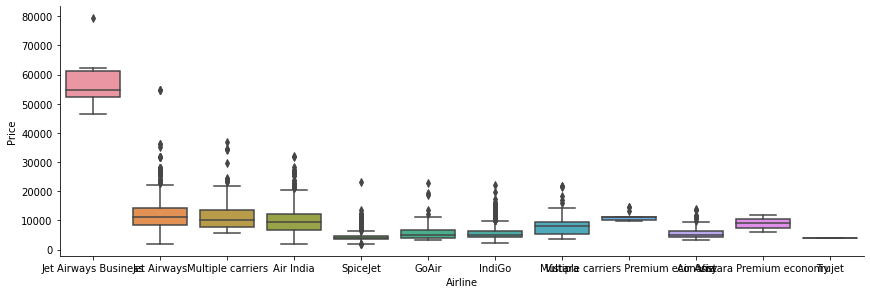

In [178]:
#Taking care of Airline column
import matplotlib.pyplot as plt
print(train['Airline'].unique())
#print(train['Airline'].nunique())
print(train['Airline'].value_counts())
sns.catplot(y = 'Price', x = 'Airline', data = train.sort_values('Price', ascending = False), 
            kind='box', height = 4, aspect = 3, orient='v')
plt.show()

## Encoding the Categorical Variables

Simple categorical encoding can be done with 'pd.get_dummies'

In [179]:
print(train.shape)
train.head()

(10462, 15)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


In [180]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Airline=train[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">"Source" Column</p></div>

In [181]:
Source=train[['Source']]
Source=pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">"Destination" Column</p></div>

In [182]:
Destination=train[['Destination']]
Destination=pd.get_dummies(Destination, drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [183]:
# Concatenate dataset with Airline, Source, Destination, Additional_Info

train = pd.concat([train, Airline, Source, Destination], axis = 1)

#Dropping the non-encoded Airline, Source, Destination variables
train.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis = 1, inplace = True)
#dropping route column as we have a stop column which basically covers the entire zest of it

<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">"Total_Stops" Column</p></div>

In [184]:
# Replacing Total_Stops
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [185]:
print(train.shape)
train.head()

(10462, 30)


,Total_Stops,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,7,25,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,19,0,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,25,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,4,45,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<div style="background-color:#f5f3f4;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Applying Feature Engineering which we implemented on Training dataset now on Test dataset</strong></h3></div>

First we consider datetime variables

In [186]:
#First we consider Duration column
test["Duration"].value_counts()

2h 50m     121
1h 30m     107
2h 45m      95
2h 55m      79
3h          72
2h 35m      70
2h 30m      58
2h 20m      48
2h 40m      38
13h 20m     32
2h 15m      29
5h 15m      29
2h 25m      24
1h 25m      24
9h 20m      22
10h 15m     22
13h 30m     21
3h 15m      20
14h 5m      20
1h 20m      20
7h 30m      19
13h         18
7h 35m      18
10h 25m     17
12h 30m     17
3h 5m       17
11h         17
6h 25m      17
9h 30m      17
8h          16
5h 30m      16
12h 10m     16
8h 40m      16
8h 25m      16
5h 45m      16
7h 15m      15
10h         15
11h 45m     15
12h 45m     14
8h 30m      14
6h 35m      14
6h 20m      14
11h 30m     14
9h          14
23h 40m     14
4h 50m      13
5h          13
15h 10m     13
6h 15m      12
19h 25m     12
12h 25m     12
7h 5m       12
11h 15m     12
27h 35m     12
12h 15m     12
10h 30m     12
5h 20m      12
9h 50m      12
14h         12
23h 50m     11
18h 20m     11
9h 45m      11
22h 30m     11
14h 30m     11
22h 55m     11
26h 20m     11
7h 20m    

In [187]:
# Converting 'Duration' column into a list
duration_test = list(test["Duration"])
duration_test

['10h 55m',
 '4h',
 '23h 45m',
 '13h',
 '2h 50m',
 '18h 20m',
 '15h 5m',
 '5h 15m',
 '2h 45m',
 '6h 5m',
 '28h 55m',
 '9h 20m',
 '10h 15m',
 '4h 40m',
 '17h 20m',
 '10h 50m',
 '9h 15m',
 '12h 15m',
 '9h 10m',
 '9h 20m',
 '14h 50m',
 '14h 5m',
 '11h 35m',
 '13h 30m',
 '2h 50m',
 '12h 25m',
 '2h 30m',
 '25h 30m',
 '19h 25m',
 '7h',
 '2h 30m',
 '11h 40m',
 '7h 5m',
 '3h',
 '1h 25m',
 '2h 40m',
 '1h 25m',
 '6h 5m',
 '17h 5m',
 '10h 40m',
 '2h 30m',
 '12h 30m',
 '1h 30m',
 '23h 40m',
 '5h 15m',
 '2h 20m',
 '23h 35m',
 '1h 30m',
 '27h 40m',
 '13h 30m',
 '28h 20m',
 '5h 45m',
 '26h 25m',
 '5h 40m',
 '2h 15m',
 '2h 55m',
 '5h 45m',
 '7h 30m',
 '5h 20m',
 '25h 50m',
 '13h 15m',
 '26h 20m',
 '5h 45m',
 '5h 40m',
 '2h 40m',
 '2h 50m',
 '5h 25m',
 '8h 45m',
 '3h',
 '7h 20m',
 '1h 30m',
 '21h 10m',
 '16h',
 '7h 50m',
 '1h 30m',
 '3h',
 '2h 50m',
 '19h 25m',
 '2h 55m',
 '14h 5m',
 '2h 50m',
 '16h 5m',
 '5h 55m',
 '2h 30m',
 '10h 15m',
 '13h 50m',
 '2h 15m',
 '11h 55m',
 '2h 30m',
 '13h 20m',
 '18h 1

In [188]:
#apply loop to separate hours from minutes
#.split() method splits a string into a list
#also, hour is represented by 'h' and minute by'm'
#.strip() method returns a copy of the string by removing both the leading and the trailing characters
for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:   
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_test[i] = '0h '+ duration_test[i]           # add 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration_test)):
    duration_hours.append(int(duration_test[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_test[i].split(sep = "m")[0].split()[-1]))

In [189]:
duration_test

['10h 55m',
 '4h 0m',
 '23h 45m',
 '13h 0m',
 '2h 50m',
 '18h 20m',
 '15h 5m',
 '5h 15m',
 '2h 45m',
 '6h 5m',
 '28h 55m',
 '9h 20m',
 '10h 15m',
 '4h 40m',
 '17h 20m',
 '10h 50m',
 '9h 15m',
 '12h 15m',
 '9h 10m',
 '9h 20m',
 '14h 50m',
 '14h 5m',
 '11h 35m',
 '13h 30m',
 '2h 50m',
 '12h 25m',
 '2h 30m',
 '25h 30m',
 '19h 25m',
 '7h 0m',
 '2h 30m',
 '11h 40m',
 '7h 5m',
 '3h 0m',
 '1h 25m',
 '2h 40m',
 '1h 25m',
 '6h 5m',
 '17h 5m',
 '10h 40m',
 '2h 30m',
 '12h 30m',
 '1h 30m',
 '23h 40m',
 '5h 15m',
 '2h 20m',
 '23h 35m',
 '1h 30m',
 '27h 40m',
 '13h 30m',
 '28h 20m',
 '5h 45m',
 '26h 25m',
 '5h 40m',
 '2h 15m',
 '2h 55m',
 '5h 45m',
 '7h 30m',
 '5h 20m',
 '25h 50m',
 '13h 15m',
 '26h 20m',
 '5h 45m',
 '5h 40m',
 '2h 40m',
 '2h 50m',
 '5h 25m',
 '8h 45m',
 '3h 0m',
 '7h 20m',
 '1h 30m',
 '21h 10m',
 '16h 0m',
 '7h 50m',
 '1h 30m',
 '3h 0m',
 '2h 50m',
 '19h 25m',
 '2h 55m',
 '14h 5m',
 '2h 50m',
 '16h 5m',
 '5h 55m',
 '2h 30m',
 '10h 15m',
 '13h 50m',
 '2h 15m',
 '11h 55m',
 '2h 30m'

In [190]:
test['Duration_hrs'] = duration_hours
test['Duration_hrs']

0       10
1        4
2       23
3       13
4        2
5       18
6       15
7        5
8        2
9        6
10      28
11       9
12      10
13       4
14      17
15      10
16       9
17      12
18       9
19       9
20      14
21      14
22      11
23      13
24       2
25      12
26       2
27      25
28      19
29       7
30       2
31      11
32       7
33       3
34       1
35       2
36       1
37       6
38      17
39      10
40       2
41      12
42       1
43      23
44       5
45       2
46      23
47       1
48      27
49      13
50      28
51       5
52      26
53       5
54       2
55       2
56       5
57       7
58       5
59      25
60      13
61      26
62       5
63       5
64       2
65       2
66       5
67       8
68       3
69       7
70       1
71      21
72      16
73       7
74       1
75       3
76       2
77      19
78       2
79      14
80       2
81      16
82       5
83       2
84      10
85      13
86       2
87      11
88       2
89      13
90      18

In [191]:
test['Duration_mins'] = duration_mins
test['Duration_mins']

0       55
1        0
2       45
3        0
4       50
5       20
6        5
7       15
8       45
9        5
10      55
11      20
12      15
13      40
14      20
15      50
16      15
17      15
18      10
19      20
20      50
21       5
22      35
23      30
24      50
25      25
26      30
27      30
28      25
29       0
30      30
31      40
32       5
33       0
34      25
35      40
36      25
37       5
38       5
39      40
40      30
41      30
42      30
43      40
44      15
45      20
46      35
47      30
48      40
49      30
50      20
51      45
52      25
53      40
54      15
55      55
56      45
57      30
58      20
59      50
60      15
61      20
62      45
63      40
64      40
65      50
66      25
67      45
68       0
69      20
70      30
71      10
72       0
73      50
74      30
75       0
76      50
77      25
78      55
79       5
80      50
81       5
82      55
83      30
84      15
85      50
86      15
87      55
88      30
89      20
90      10

In [192]:
test.drop('Duration', axis=1, inplace=True)

In [193]:
test['Day_of_Journey']=pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y').dt.day
test['Month_of_Journey']=pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y').dt.month
test.drop('Date_of_Journey', axis = 1, inplace = True)

test['Dep_hr'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_min'] = pd.to_datetime(test['Dep_Time']).dt.minute
test.drop('Dep_Time', axis = 1, inplace = True)

test['Arrival_hr'] = pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arrival_min'] = pd.to_datetime(test['Arrival_Time']).dt.minute
test.drop('Arrival_Time', axis = 1, inplace = True)

In [194]:
print('Test dataset shape:', test.shape)

Test dataset shape: (2645, 14)


Now that the datetime variables have been taken care of, we shift our focus to categorical variable columns. 

In [195]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Airline=test[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)

Source=test[['Source']]
Source=pd.get_dummies(Source, drop_first= True)

Destination=test[['Destination']]
Destination=pd.get_dummies(Destination, drop_first= True)


# Concatenate dataset with Airline, Source, Destination, Additional_Info
test= pd.concat([test, Airline, Source, Destination], axis = 1)

#Dropping the non-encoded Airline, Source, Destination variables
test.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis = 1, inplace = True)
#dropping route column as we have a stop column which basically covers the entire zest of it 


#Let's take care of Total_Stops
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test['Total_Stops'] = encoder.fit_transform(test['Total_Stops'])

print(test.shape)
test.head()

(2645, 28)


,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,10,55,6,6,17,30,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,4,0,12,5,6,20,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,23,45,21,5,19,15,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,13,0,21,5,8,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,2,50,24,6,23,55,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">Train-Dataset Columns</p></div>

In [196]:
train.columns

Index(['Total_Stops', 'Price', 'Duration_hrs', 'Duration_mins',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">Test-Dataset Columns</p></div>

In [197]:
test.columns

Index(['Total_Stops', 'Duration_hrs', 'Duration_mins', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

<div style="background-color:#f5f3f4;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Building the training and test dataset</strong></h3></div>

In [198]:
train.dtypes

Total_Stops                                  int64
Price                                        int64
Duration_hrs                                 int64
Duration_mins                                int64
Day_of_Journey                               int64
Month_of_Journey                             int64
Dep_hr                                       int64
Dep_min                                      int64
Arrival_hr                                   int64
Arrival_min                                  int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                               uint8
Airline_Vistara                

In [199]:
price=train.Price
train.drop('Price', axis=1, inplace=True)
train=train.join(price)
train.head()

,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897
1,2,7,25,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662
2,2,19,0,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882
3,1,5,25,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218
4,1,4,45,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302


In [200]:
X = train.loc[:, ['Total_Stops', 'Duration_hrs', 'Duration_mins',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7,25,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,19,0,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,25,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,4,45,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [201]:
y = train.iloc[:, -1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
5         3873
6        11087
7        22270
8        11087
9         8625
10        8907
11        4174
12        4667
13        9663
14        4804
15       14011
16        5830
17       10262
18       13381
19       12898
20       19495
21        6955
22        3943
23        4823
24        7757
25       13292
26        8238
27        7682
28        4668
29        3687
30        3687
31       13227
32        4423
33       10919
34       12373
35        5894
36        4649
37        6245
38       19225
39       14924
40        9646
41        8714
42       12373
43        3383
44       13062
45        3527
46        3943
47        4667
48        6117
49       11150
50        7202
51       12121
52        4377
53        3943
54        4483
55       14231
56       17345
57        7414
58        8073
59       12395
60        8366
61        5117
62       12524
63        7191
64        3687
65        5894
66        

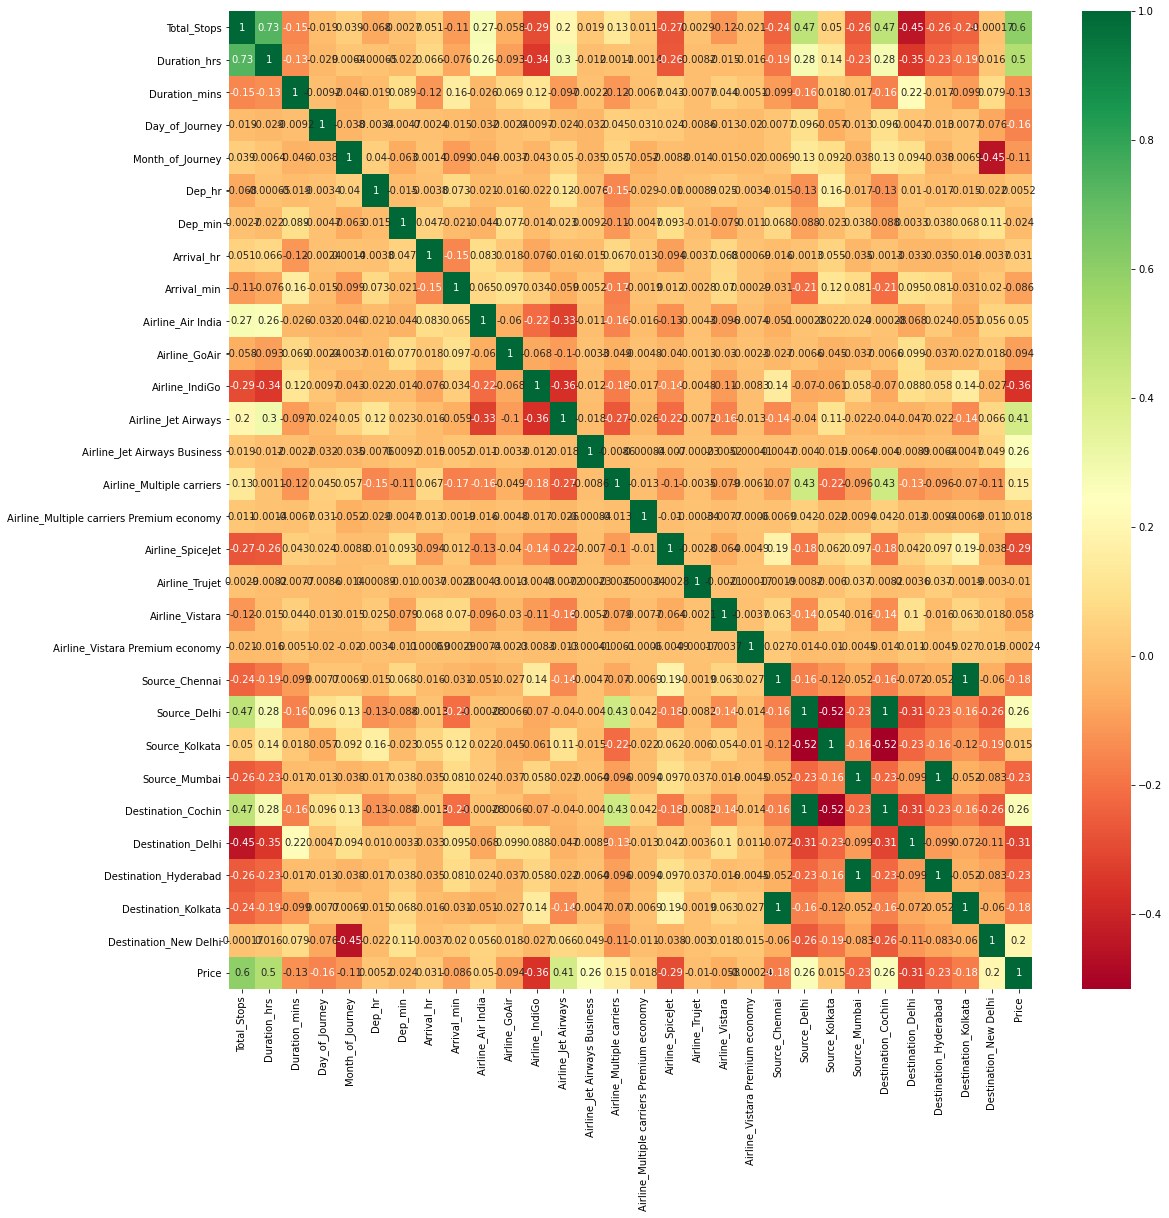

In [202]:
plt.figure(figsize=(18, 18))
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn')
plt.show()

<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">Extracting Important feature using ExtraTreesRegressor</p></div>

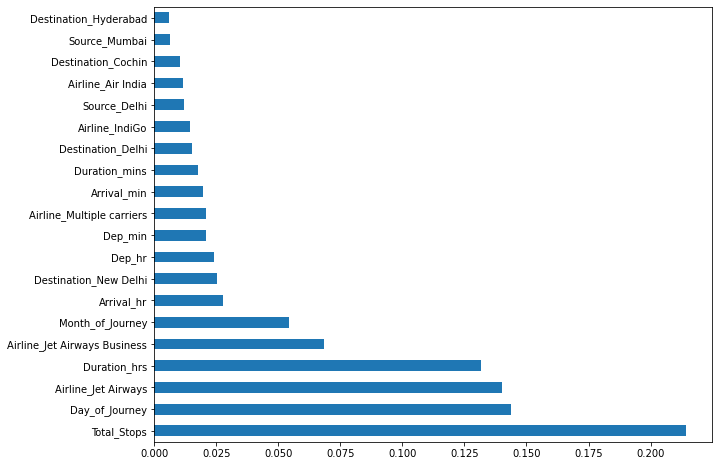

In [203]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

#bar graph of feature importances 
plt.figure(figsize = (10,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

From the above graph, "Total_Stops" is the most important feature. Looking closely, at the high end of the feature importance spectrum, there are no 2 features which are similar in their importance. However, at the lower end, we have 4 features which are almost similar in their importance. So, here I may decide on reducing the dimensionality of the features but chose not to do so because the dimensionality of the dataset is not too large and my model seems to handle it well.

In [204]:
# Importing Libraries to use models and get accuracy
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=20)

<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">Diving data in training and testing 80-20 ratio.</p></div>

In [205]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

<div style="background-color:#f5f3f4;">
<h3 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Training Models</strong></h3></div>

##### R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.

<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">Linear Regression</p></div>

In [206]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred=lin_reg.predict(X_test)

print("Linear Regression Score on Training set is",lin_reg.score(X_train, y_train))#Training Accuracy
print("Linear Regression Score on Test Set is",lin_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(lin_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Linear Regression Score on Training set is 0.6314135216029015
Linear Regression Score on Test Set is 0.5876298736835857


C:\Python395\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=20.



[0.68604528 0.5723649  0.55056869 0.57795776 0.57631366 0.61982311
 0.62083454 0.6290112  0.73524313 0.72387748 0.5365299  0.60244221
 0.67901434 0.62852525 0.70470287 0.60100049 0.61123372 0.61518718
 0.56804881 0.62080514]
Accuracy: 62.30 %
Standard Deviation: 5.49 %
Mean Absolute Error: 1989.0845627272342
Mean Squared Error: 8690966.516171802
RMSE: 2948.0445241162492
The r2_score is 0.5876298736835857


<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">Decision Tree Regressor</p></div>

In [207]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Decision Tree Score on Training set is 0.970463016512751
Decision Tree Score on Test Set is 0.6429554634867729


C:\Python395\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=20.



[0.6740031  0.64608269 0.69481809 0.69495009 0.5879757  0.736558
 0.72628596 0.68899646 0.78979142 0.78650059 0.73457614 0.6827305
 0.71421261 0.73857421 0.62476846 0.72267276 0.46804665 0.6973683
 0.67472514 0.70812278]
Accuracy: 68.96 %
Standard Deviation: 6.91 %
Mean Absolute Error: 1430.0988214683869
Mean Squared Error: 7524944.009250411
RMSE: 2743.1631393795033
The r2_score is 0.6429554634867729


<div style="background-color:#E5E5E5;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;"">Random Forest</p></div>

Random Forest Score on Training set is 0.8873137687165084
Random Forest Score on Test Set is 0.8083119831962708


C:\Python395\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=20.



[0.87079484 0.77441942 0.77450772 0.82683384 0.80830641 0.84277413
 0.86809663 0.85192572 0.86740275 0.7825758  0.78355049 0.77705683
 0.85685688 0.85943465 0.67238547 0.83403381 0.84674462 0.86454581
 0.84910079 0.8537344 ]
Accuracy: 82.33 %
Standard Deviation: 4.85 %
Mean Absolute Error: 1195.5669773054856
Mean Squared Error: 4039948.6511646323
RMSE: 2009.9623506833734
The r2_score is 0.8083119831962708


C:\Python395\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



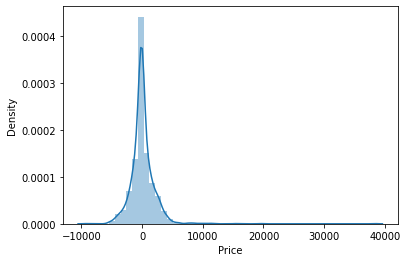

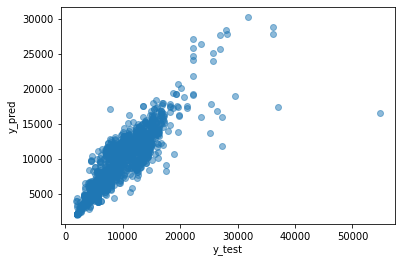

In [208]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

#### On plotting the value {y_test-y_pred}, I am getting a very narrow gaussian distributed curve for all regression models, which shows that the difference between actual(test) and predicted value is minimal.

<div style="background-color:#f5f3f4;">
<p style= "font-family:Georgia;color:#2b2d42;font-size:110%;text-align:center;border-radius:4px 4px;border-style: solid;border-width:5px;border-color:#e56b6f; padding: 1px 1px;"><br>When all the metrics are considered,<strong> Random Forest Regressor model </strong>gave me the best scores.<br><br>
</p>
</div>

<div style="background-color:#f5f3f4;">
<h2 style="color:#000000;font-size:35px;font-family:Georgia;text-align:center;"><strong>Save the Model(Random Forest Regressor) and dump as a Pickle File</strong></h2>
</div>

In [209]:
import pickle
# dump information to the file
pickle.dump(rf_reg, open('rf_reg.pkl', 'wb'))
model = pickle.load(open('rf_reg.pkl', 'rb'))

In [210]:
model.predict([[0,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])

array([5230.24306818])